# Codes from the Online Course

##

In [14]:
import pandas as pd
import csv
import seaborn as sns
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from datetime import date
import json
%matplotlib inline

In [2]:
list(range(0,5))

[0, 1, 2, 3, 4]

In [4]:
# importing stock from yahoo finance
tickers = ['IAU']
mydata =  pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t,data_source='yahoo',start='2000-1-1')['Adj Close']
    
mydata  

,IAU
Date,
2005-01-28,8.538000
2005-01-31,8.454000
2005-02-01,8.424000
2005-02-02,8.446000
2005-02-03,8.344000
...,...
2021-07-23,34.290001
2021-07-26,34.230000
2021-07-27,34.290001


<AxesSubplot:xlabel='Date'>

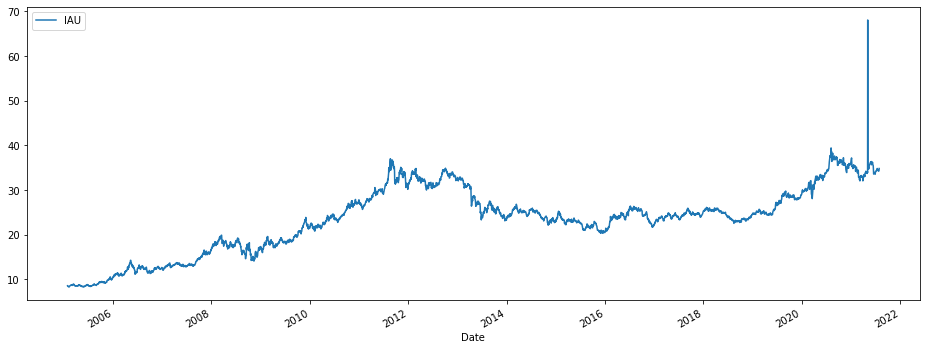

In [6]:
mydata.plot(figsize=(16,6))

In [7]:
# using rolling method ( also know as Moving Average)
# seven days
mydata.rolling(7).mean().head(20)

,IAU
Date,
2005-01-28,NaN
2005-01-31,NaN
2005-02-01,NaN
2005-02-02,NaN
2005-02-03,NaN
2005-02-04,NaN
2005-02-07,8.396572
2005-02-08,8.356572
2005-02-09,8.330000


<AxesSubplot:xlabel='Date'>

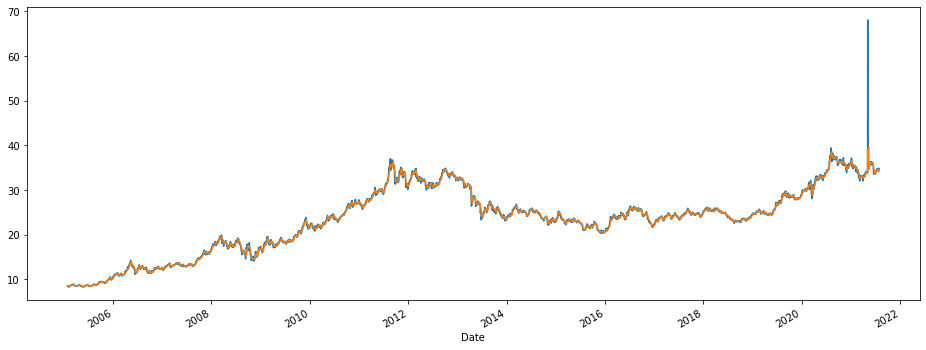

In [23]:
# ploting the 'IAU' series with 7 days moving average
mydata['IAU'].plot(figsize=(16,6))
mydata['IAU'].rolling(window=7).mean().plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

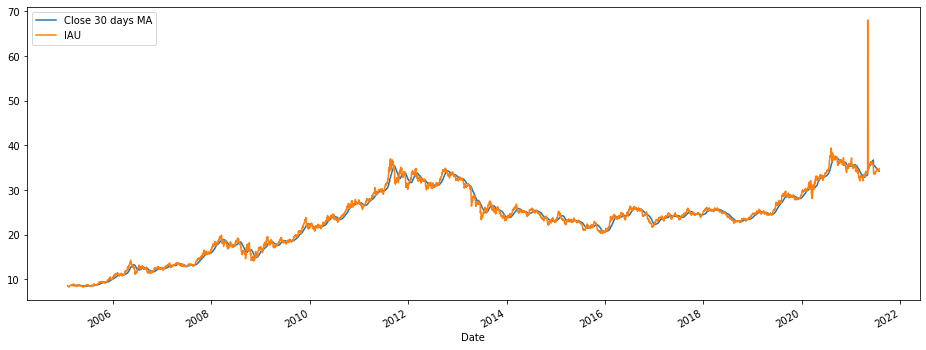

In [25]:
# it adds the legend automatically
mydata['Close 30 days MA'] = mydata['IAU'].rolling(window=30).mean() 
mydata[['Close 30 days MA', 'IAU']].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

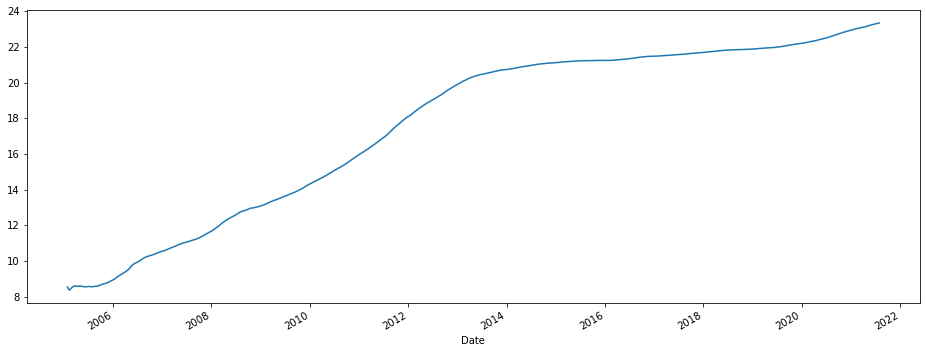

In [26]:
# expanding -  takes the average price for each day until the beginning 
mydata['IAU'].expanding().mean().plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

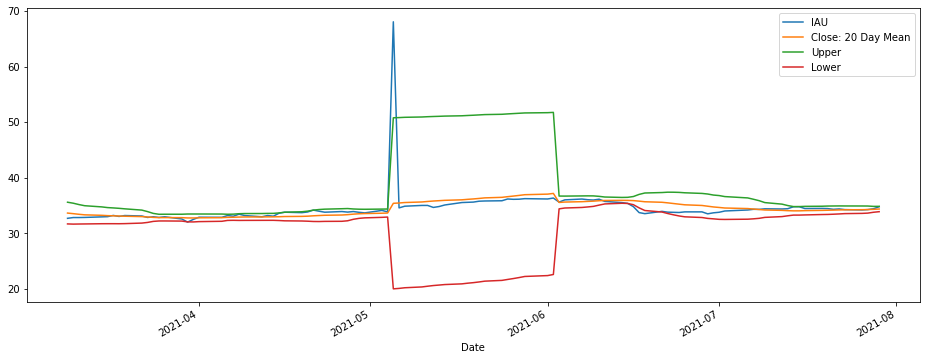

In [33]:
## Bollinger Bands
# Close 20 MA
mydata['Close: 20 Day Mean'] = mydata['IAU'].rolling(20).mean() 

# Upper = 20MA + 2*std(20)
mydata['Upper'] = mydata['Close: 20 Day Mean'] + 2*(mydata['IAU'].rolling(20).std())

# Lower = 20MA - 2*std(20)
mydata['Lower'] = mydata['Close: 20 Day Mean'] - 2*(mydata['IAU'].rolling(20).std())

#Close
mydata[['IAU','Close: 20 Day Mean','Upper','Lower']].tail(100).plot(figsize=(16,6))